# Thermodynamic analysis of strategy enabling anaerobic production of PHB

In this script, we have performed the MDF analyses for the thermodynamic investigation of the NOG+EMP pathway in comparison to other strategies enabling PHB production, also demonstrating how the analysis of other pathways and metabolic engineering strategies could be analyzed by other researchers with the custom-made functions we have developed in this study.

In [1]:
from equilibrator_api import Q_ #for creating quantity variables
import equilibrator_custom_functions as eq #custom functions created during analysis
import numpy as np #numerical package
import math
import matplotlib.pyplot as plt #plotting package

Fragments already downloaded
Fragments already downloaded


# Input Files and their formats

The script's input is based on the two custom __input csv files__, which are:

   __The compound file__, with metabolite names, IDs and bounds. It is currently name "metabolite_reference_table"
   
   This file uses a custom csv file format, which contains information of multiple metabolites, to create a dictionary which will be used for the eQuilibrator API for high throughput analysis. This dictionary allows for writing reactions in a simpler way (with acronyms), and customizing the ranges of metabolites according to data. The columns contain the following elements:

| Metabolite Acronym        | keggID                          | Lower Bound (M)             | Upper Bound (M)               |
|------------------|----------------------------------|----------------------|------------------------|
|Custom-defined name for metabolite| Kegg ID to identify metabolite (necessary to use specific kegg ID) | Custom-defined minimal concentration (in M)| Custom-defined maximal concentration (in M) |

Notice that the column names do not need to be mantained in order to be recognized in the script. More usefull information can be added to the other columns, as the script will ignore the information stored in these.

   __The pathway file__, with reaction names, formulae, fluxes, and, in the case of ECM, enzyme parameters (which will be read by other functions below). Being pathway specific, there are many files referenced in this script. The columns contain the follow basic setup:
   
| Reaction Formula        | Relative Flux                          | Reaction Name  |     Standard dG (kJ/mol)        | kcrf(1/s) | MWe(Da)        | kM(mM) |
|------------------|----------------------------------|----------------------|------------------------|-----------------|-------|-----|
|Using the acronyms defined in the compound file: S1 + S2 <=> P1 + P2| The relative stoichiometric coefficient of the reaction in the pathway | Customizable name to identify the reaction in graphs, for example | __(Optional)__ Standard Gibs Free Energy of Reaction in kJ/mol. These are custom values that can replace the values obtained from the eQuilibrator packages|__(Only needed for ECM)__ Forward catalytic rate of reaction's enzyme in 1/s (mind the direction of the reaction) |__(Only needed for ECM)__ Enzyme molecular weight, equivalent to Daltons |__(Only needed for ECM)__ Michaelis costants of each substrate and product (except water) in milimolar, with format example 'S1: 0.1 S2:0.02 P1:3 P2:0.3' | 

# Setting Intracellular Conditions

Below we set the intracellular conditions in *E. coli*, i.e the pH, ionic strengh, temperature and pMg (which have an effect on the thermodynamics of reactions). Note that metabolite concentration bounds are also organism specific, but are defined in the compound file.

In the cell bellow the name of the compound csv file is defined __("metabolite_reference_table")__. With the function __eq.obtain_compound_settings( string: compound_file_name )__, we construct a __CompoundSettings__ object containing data structures for idetifying compounds and setting their maximal and minimal concentrations for the model)

With __eq.change_bounds__ , one can create a new CompoundSettings object with specific changes in the metabolite concentration bounds.

The __eq.fix_concentrations__ function can also be used when the concentration needs to fixed at a specific concentration

In [2]:
#E. coli physiological conditions as a dictionary
E_coli_con = {
            "p_h": str(Q_("7.5")),
            "p_mg": str(Q_(3)),
            "ionic_strength": str(Q_('200 mM')),
            "temperature": str(Q_(37+273.15,"K")),
            "kcat_source": "fwd",
}

#Generating Compound Settings with the default eQuilibrator bounds
cs_default_bounds = eq.obtain_compound_settings("metabolite_reference_table_default", custom_bounds = True)

# Initial Max-min Driving Force (MDF) analysis

The MDF analysis can be quickly performed with the __eq.MDF_analysis__ function, receiving a full report of the results:

6 ADP + 6 Pi + 2 NADH + 2 AcCoA + 3 Gluc <=> 5 H2O + 6 ATP + 2 NAD + 2 CoA + 6 FOR + 2 ACDH + 2 ETOH + PHB


C:\Programs\Anaconda3\envs\MarcosPaper\lib\site-packages\pandas\core\dtypes\cast.py:1638: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


'MDF = 8.531 kilojoule / mole'

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,GluKin,ATP + Gluc <=> ADP + G6P,3.0 molar / second,-21.085446220529004 kilojoule / mole,-21.085446220529004 kilojoule / mole,-14.124321688481583 kilojoule / mole,0.000000
1,PGI,G6P <=> F6P,3.0 molar / second,2.504746329360183 kilojoule / mole,2.504746329360183 kilojoule / mole,-8.530605170250633 kilojoule / mole,0.076923
2,PFK,ATP + F6P <=> ADP + FBP,3.0 molar / second,-20.529724261080972 kilojoule / mole,-20.529724261080972 kilojoule / mole,-8.530605170250618 kilojoule / mole,0.076923
3,ALD,FBP <=> G3P + DHAP,3.0 molar / second,21.625291050904107 kilojoule / mole,4.510453516183075 kilojoule / mole,-8.530605170250627 kilojoule / mole,0.076923
4,TPI,DHAP <=> G3P,3.0 molar / second,5.524778053934204 kilojoule / mole,5.524778053934204 kilojoule / mole,-8.53060517025063 kilojoule / mole,0.076923
5,GAPDH,NAD + Pi + G3P <=> NADH + BPG,6.0 molar / second,0.09588830493075307 kilojoule / mole,17.210725839651786 kilojoule / mole,-8.530605170250633 kilojoule / mole,0.153846
6,PGK,ADP + BPG <=> ATP + P3G,6.0 molar / second,-18.690672227296382 kilojoule / mole,-18.690672227296382 kilojoule / mole,-8.530605170250615 kilojoule / mole,0.076923
7,PGM,P3G <=> P2G,6.0 molar / second,4.144848234318587 kilojoule / mole,4.144848234318587 kilojoule / mole,-8.530605170250633 kilojoule / mole,0.076923
8,ENO,P2G <=> H2O + PEP,6.0 molar / second,-4.084866985726669 kilojoule / mole,-4.084866985726669 kilojoule / mole,-8.53060517025064 kilojoule / mole,0.076923
9,PYK,ADP + PEP <=> ATP + PYR,6.0 molar / second,-22.983870978883147 kilojoule / mole,-22.983870978883147 kilojoule / mole,-8.530605170250624 kilojoule / mole,0.000000


,compound,concentration,shadow_price,lower_bound,upper_bound
0,H2O,1.0 molar,-7.692308e-02,1.0 molar,1.0 molar
1,ATP,0.0006022944098531027 molar,0.000000e+00,1e-06 molar,0.01 molar
2,ADP,0.010000000000000004 molar,-5.273559e-16,1e-06 molar,0.01 molar
3,NAD,0.010000000000000004 molar,0.000000e+00,1e-06 molar,0.01 molar
4,Pi,0.009999999999999915 molar,1.538462e-01,1e-06 molar,0.01 molar
5,NADH,1.2230494606785561e-05 molar,0.000000e+00,1e-06 molar,0.01 molar
6,CoA,1.0000000000000004e-06 molar,-1.538462e-01,1e-06 molar,0.01 molar
7,AcCoA,0.009999999999999995 molar,3.076923e-01,1e-06 molar,0.01 molar
8,PYR,0.005670920651123305 molar,0.000000e+00,1e-06 molar,0.01 molar
9,FOR,7.668957806958953e-05 molar,-5.273559e-16,1e-06 molar,0.01 molar


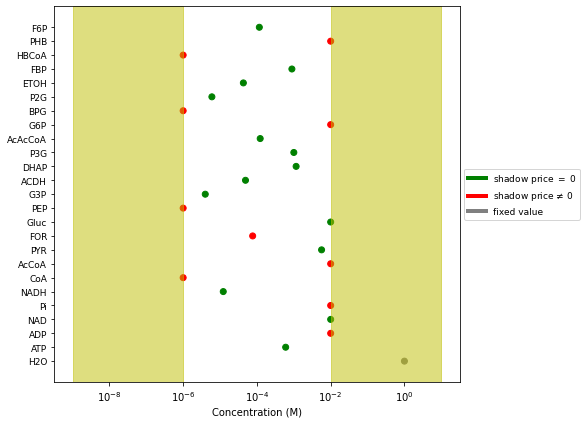

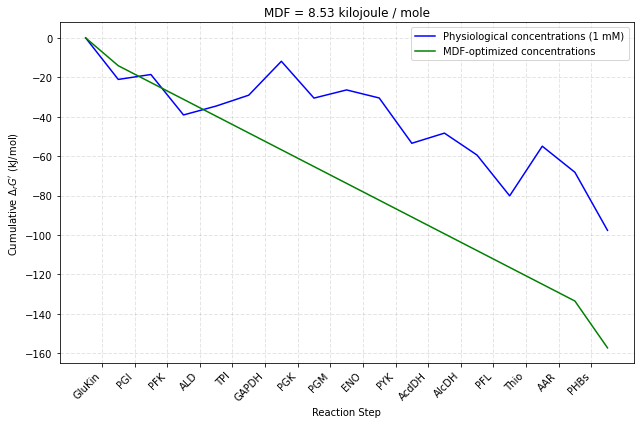

In [3]:
mdf_result = eq.MDF_analysis("EMP",cs_default_bounds,E_coli_con)

In [4]:
import os  
os.rename('MDF.tiff','MDFEMP_default.tiff')

3 ADP + 3 Pi + 2 NADH + 2 AcCoA + 3 Gluc <=> 2 H2O + 3 ATP + 2 NAD + 2 CoA + 6 FOR + 2 ACDH + 2 ETOH + PHB


C:\Programs\Anaconda3\envs\MarcosPaper\lib\site-packages\pandas\core\dtypes\cast.py:1638: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


'MDF = 11.380 kilojoule / mole'

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,GluKin,ATP + Gluc <=> ADP + G6P,3.0 molar / second,-21.085446220529004 kilojoule / mole,-21.085446220529004 kilojoule / mole,-11.379901065518062 kilojoule / mole,6.661338e-16
1,G6PDH,NAD + G6P <=> NADH + P6Glac,3.0 molar / second,-8.74921016719587 kilojoule / mole,-8.74921016719587 kilojoule / mole,-11.379901065518062 kilojoule / mole,0.000000e+00
2,PGase,H2O + P6Glac <=> P6GLN,3.0 molar / second,-26.79104763497954 kilojoule / mole,-26.79104763497954 kilojoule / mole,-26.79104763497954 kilojoule / mole,0.000000e+00
3,GLNdeh,P6GLN <=> H2O + KDPG,3.0 molar / second,-42.976013092669696 kilojoule / mole,-42.976013092669696 kilojoule / mole,-42.976013092669696 kilojoule / mole,0.000000e+00
4,KDPGald,KDPG <=> PYR + G3P,3.0 molar / second,16.311474747865493 kilojoule / mole,-0.8033627868555392 kilojoule / mole,-11.379901065518064 kilojoule / mole,1.009475e-16
5,GAPDH,NAD + Pi + G3P <=> NADH + BPG,3.0 molar / second,0.09588830493075307 kilojoule / mole,17.210725839651786 kilojoule / mole,-11.379901065518055 kilojoule / mole,-2.576282e-16
6,PGK,ADP + BPG <=> ATP + P3G,3.0 molar / second,-18.690672227296382 kilojoule / mole,-18.690672227296382 kilojoule / mole,-11.379901065518059 kilojoule / mole,-3.212057e-16
7,PGM,P3G <=> P2G,3.0 molar / second,4.144848234318587 kilojoule / mole,4.144848234318587 kilojoule / mole,-11.379901065518062 kilojoule / mole,5.000000e-01
8,ENO,P2G <=> H2O + PEP,3.0 molar / second,-4.084866985726669 kilojoule / mole,-4.084866985726669 kilojoule / mole,-11.379901065518066 kilojoule / mole,5.000000e-01
9,PYK,ADP + PEP <=> ATP + PYR,3.0 molar / second,-22.983870978883147 kilojoule / mole,-22.983870978883147 kilojoule / mole,-24.28391971017493 kilojoule / mole,0.000000e+00


,compound,concentration,shadow_price,lower_bound,upper_bound
0,H2O,1.0 molar,-5.000000e-01,1.0 molar,1.0 molar
1,ATP,2.533720314891459e-05 molar,0.000000e+00,1e-06 molar,0.01 molar
2,ADP,0.010000000000000004 molar,0.000000e+00,1e-06 molar,0.01 molar
3,NAD,0.010000000000000023 molar,0.000000e+00,1e-06 molar,0.01 molar
4,Pi,0.010000000000000014 molar,0.000000e+00,1e-06 molar,0.01 molar
5,NADH,0.0004404383498024266 molar,0.000000e+00,1e-06 molar,0.01 molar
6,CoA,1.0000000000000004e-06 molar,0.000000e+00,1e-06 molar,0.01 molar
7,AcCoA,0.010000000000000014 molar,0.000000e+00,1e-06 molar,0.01 molar
8,PYR,0.00023353949255471167 molar,0.000000e+00,1e-06 molar,0.01 molar
9,FOR,1.0000000000000004e-06 molar,-1.009475e-16,1e-06 molar,0.01 molar


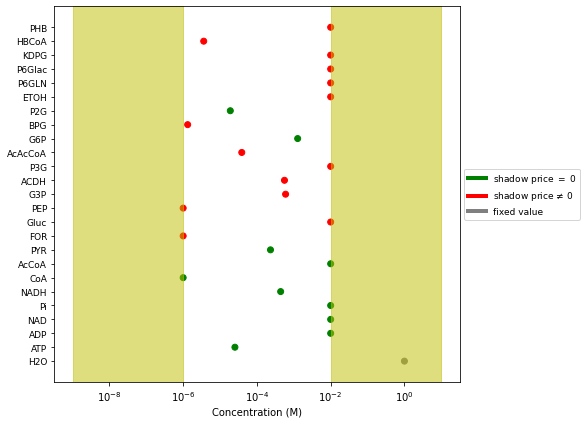

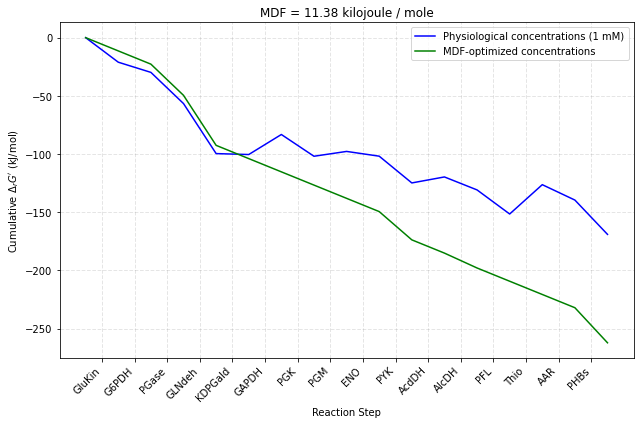

In [5]:
mdf_result = eq.MDF_analysis("ED",cs_default_bounds,E_coli_con)

In [6]:
os.rename('MDF.tiff','MDFED_default.tiff')

ADP + Pi + 3 Gluc <=> 5 H2O + ATP + 2 CO2 + 2 PHB


C:\Programs\Anaconda3\envs\MarcosPaper\lib\site-packages\pandas\core\dtypes\cast.py:1638: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


'MDF = 7.167 kilojoule / mole'

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,GluKin,ATP + Gluc <=> ADP + G6P,3.0 molar / second,-21.085446220529004 kilojoule / mole,-21.085446220529004 kilojoule / mole,-9.789825575800474 kilojoule / mole,0.000000e+00
1,PGI,G6P <=> F6P,3.0 molar / second,2.504746329360183 kilojoule / mole,2.504746329360183 kilojoule / mole,-7.166509492396869 kilojoule / mole,2.857143e-01
2,PKT,Pi + X5P <=> H2O + G3P + AcP,6.0 molar / second,-60.176984488506115 kilojoule / mole,-60.176984488506115 kilojoule / mole,-29.8760789351305 kilojoule / mole,0.000000e+00
3,TALA,E4P + F6P <=> G3P + S7P,2.0 molar / second,0.6928028030912127 kilojoule / mole,0.6928028030912127 kilojoule / mole,-7.166509492396869 kilojoule / mole,1.428571e-01
4,TKT1,G3P + S7P <=> Ri5P + X5P,2.0 molar / second,3.8258091024354592 kilojoule / mole,3.8258091024354592 kilojoule / mole,-7.166509492396873 kilojoule / mole,1.428571e-01
5,RibIso,Ri5P <=> Ru5P,2.0 molar / second,2.0079526585601943 kilojoule / mole,2.0079526585601943 kilojoule / mole,-7.166509492396868 kilojoule / mole,1.428571e-01
6,RibEpi,Ru5P <=> X5P,2.0 molar / second,-3.365693996619711 kilojoule / mole,-3.365693996619711 kilojoule / mole,-7.166509492396872 kilojoule / mole,1.428571e-01
7,TKT2,G3P + F6P <=> X5P + E4P,2.0 molar / second,10.12342046591853 kilojoule / mole,10.12342046591853 kilojoule / mole,-7.16650949239687 kilojoule / mole,1.428571e-01
8,TPI,G3P <=> DHAP,1.0 molar / second,-5.524778053934204 kilojoule / mole,-5.524778053934204 kilojoule / mole,-7.166509492396872 kilojoule / mole,2.919567e-16
9,ALD,G3P + DHAP <=> FBP,1.0 molar / second,-21.625291050904107 kilojoule / mole,-4.510453516183075 kilojoule / mole,-8.57366792262743 kilojoule / mole,0.000000e+00


,compound,concentration,shadow_price,lower_bound,upper_bound
0,H2O,1.0 molar,8.650027e-17,1.0 molar,1.0 molar
1,ATP,0.00010472012977571066 molar,0.000000e+00,1e-06 molar,0.01 molar
2,ADP,0.010000000000000004 molar,2.074607e-17,1e-06 molar,0.01 molar
3,NAD,0.010000000000000004 molar,-4.083066e-17,1e-06 molar,0.01 molar
4,Pi,0.0004882702510934686 molar,0.000000e+00,1e-06 molar,0.01 molar
5,NADH,0.002604113807940078 molar,0.000000e+00,1e-06 molar,0.01 molar
6,CoA,0.00021288877519630602 molar,0.000000e+00,1e-06 molar,0.01 molar
7,CO2,0.010000000000000004 molar,-1.878320e-16,1e-06 molar,0.01 molar
8,AcCoA,0.009999999999999969 molar,3.691595e-16,1e-06 molar,0.01 molar
9,PYR,0.010000000000000004 molar,-8.422078e-17,1e-06 molar,0.01 molar


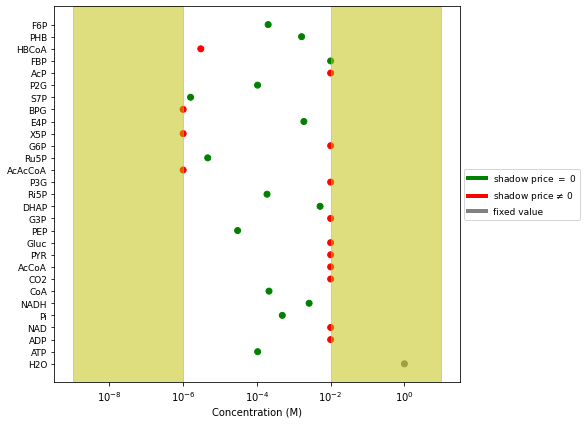

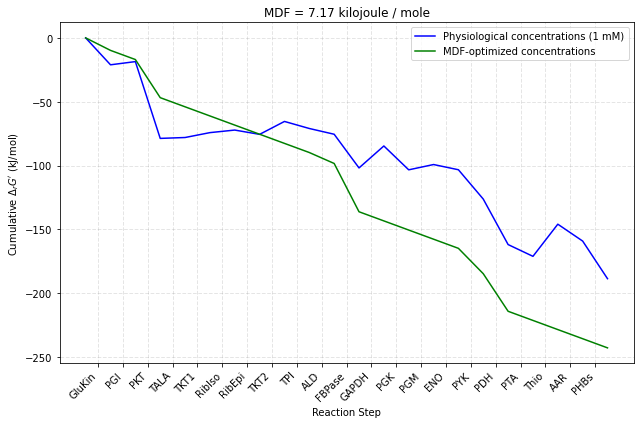

In [7]:
mdf_result = eq.MDF_analysis("NOGEMP",cs_default_bounds,E_coli_con)

In [8]:
os.rename('MDF.tiff','MDFNOGEMP_default.tiff')